# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy

import warnings
warnings.filterwarnings('ignore')

from datetime import date
import yfinance as yf
import pandas_datareader as data


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.callbacks import EarlyStopping 

import tensorflow as tf

import math
from sklearn.metrics import mean_squared_error

In C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

In [2]:
start = '2010-01-01'
today= date.today().strftime("%Y-%m-%d")
stock_name = input('Enter Company Name  : ' ) +'.NS'
df = data.DataReader(stock_name,'yahoo',start,today)
df.head()

Enter Company Name  : M&MFin


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,70.389999,66.889999,68.620003,69.209999,442345.0,63.501263
2010-01-05,70.750000,68.610001,69.959999,69.599998,420815.0,63.859089
2010-01-06,70.760002,67.800003,70.000000,69.010002,240680.0,63.317749
2010-01-07,69.400002,67.800003,68.800003,68.900002,157710.0,63.216839
2010-01-08,69.400002,68.019997,69.000000,68.269997,85340.0,62.638790


In [3]:
 from sklearn.preprocessing import power_transform

In [4]:
power = power_transform(df,method='yeo-johnson', standardize=True)

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,70.389999,66.889999,68.620003,69.209999,442345.0,63.501263
2010-01-05,70.750000,68.610001,69.959999,69.599998,420815.0,63.859089
2010-01-06,70.760002,67.800003,70.000000,69.010002,240680.0,63.317749
2010-01-07,69.400002,67.800003,68.800003,68.900002,157710.0,63.216839
2010-01-08,69.400002,68.019997,69.000000,68.269997,85340.0,62.638790
...,...,...,...,...,...,...
2021-11-08,200.750000,195.550003,196.050003,199.649994,4457795.0,199.649994
2021-11-09,206.350006,198.899994,199.750000,202.500000,8332449.0,202.500000
2021-11-10,204.649994,198.850006,201.850006,200.550003,3811176.0,200.550003


## Understand the Data

In [6]:
df.shape

(2925, 6)

In [7]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [8]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2925.000000,2925.000000,2925.000000,2925.000000,2.925000e+03,2925.000000
mean,255.868631,246.109935,251.087143,250.797372,3.008136e+06,242.248008
std,115.372859,111.724034,113.677848,113.551414,6.639786e+06,112.086893
min,65.190002,62.040001,63.480000,62.959999,0.000000e+00,57.766785
25%,147.800003,141.399994,144.639999,144.690002,6.488410e+05,136.539291
50%,249.649994,241.000000,245.250000,245.199997,1.315378e+06,234.147018
75%,333.200012,321.000000,326.500000,326.149994,2.604313e+06,318.874359
max,534.000000,516.650024,532.500000,528.150024,2.082185e+08,514.796936


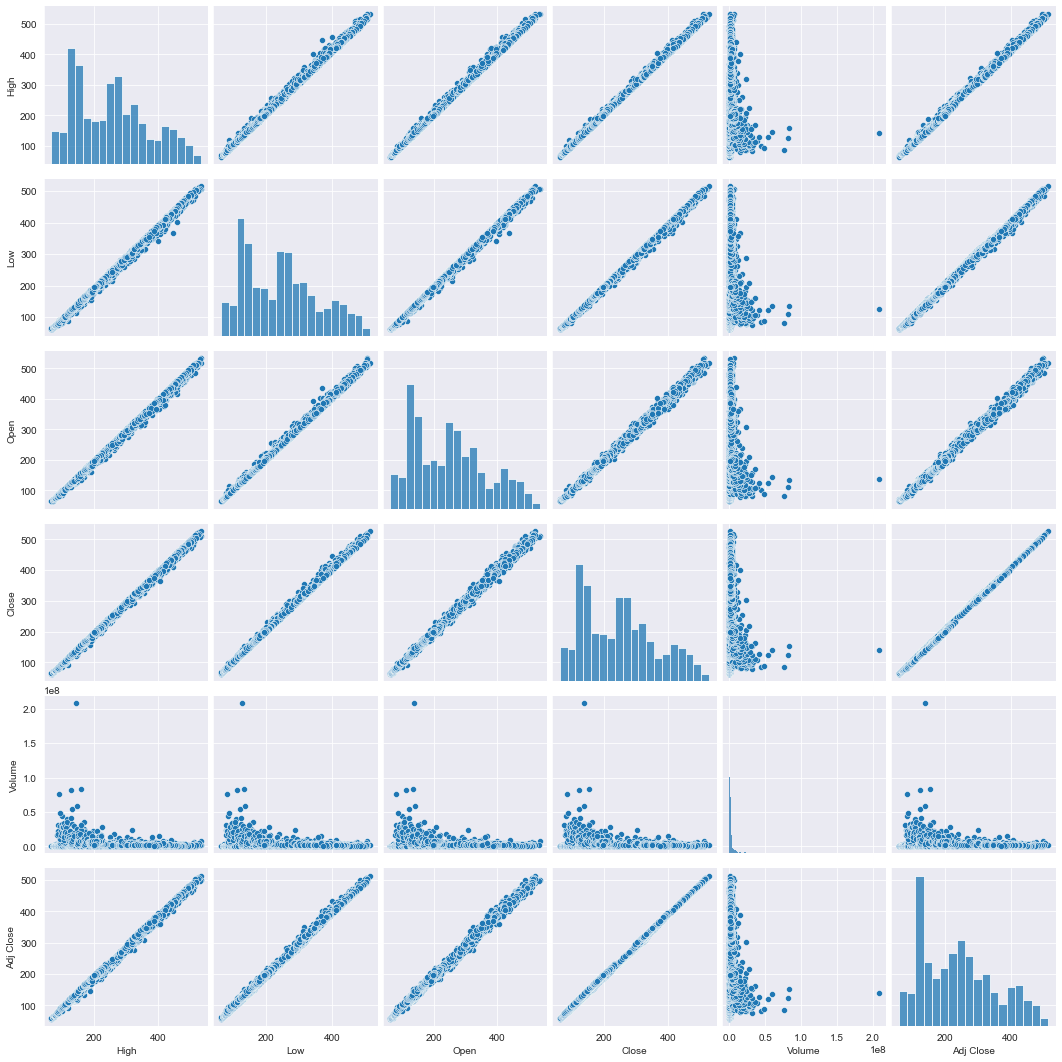

In [10]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

[]

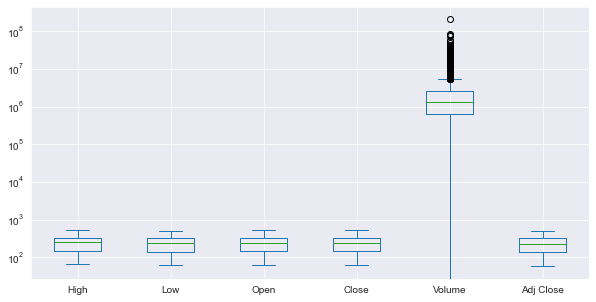

In [11]:
df.plot(kind='box',figsize=(10,5))
plt.semilogy()

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Adj Close'}>]], dtype=object)

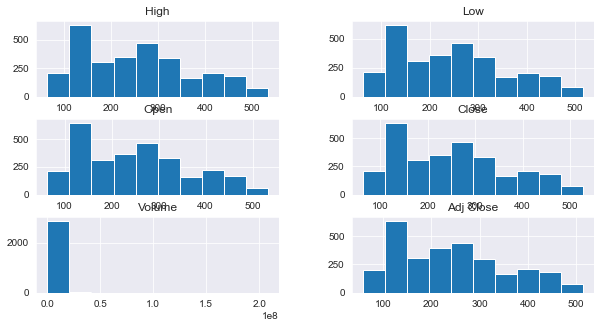

In [12]:
df.hist(figsize=(10,5))

<AxesSubplot:ylabel='Date'>

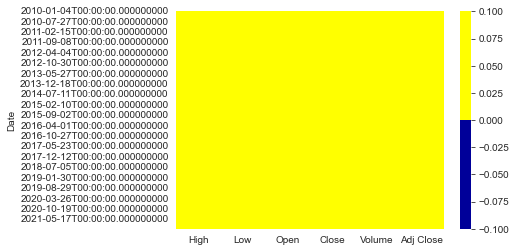

In [13]:
cols = df.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

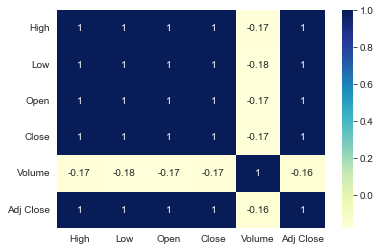

In [14]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Summary for data set

## We have checked multiple parameters

### 1. Scatter plot & Heat Map ----- To check  collinearity of the data
### 2. Box plot ----------- To check Outliear in the data set
### 3. Histogram --------- To check the distribution of the data set


####  As we have seen from data
* 1. Null Values are present --- Need to drop them from our data set or Need to imputation(mean,median,mode)
* 2. Outliers are present in Volume column ----- As we observed Vol has dirrent scale wrt other Col and correlation with others are not good, so that Col is not required 
* 3. As we seen each col are highly collinearity with each other and from our research we are going to work on Close data

## Prepare Data 

In [15]:
df.dropna(inplace=True) # Drop all null values

In [16]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,70.389999,66.889999,68.620003,69.209999,442345.0,63.501263
2010-01-05,70.750000,68.610001,69.959999,69.599998,420815.0,63.859089
2010-01-06,70.760002,67.800003,70.000000,69.010002,240680.0,63.317749
2010-01-07,69.400002,67.800003,68.800003,68.900002,157710.0,63.216839
2010-01-08,69.400002,68.019997,69.000000,68.269997,85340.0,62.638790
...,...,...,...,...,...,...
2021-11-08,200.750000,195.550003,196.050003,199.649994,4457795.0,199.649994
2021-11-09,206.350006,198.899994,199.750000,202.500000,8332449.0,202.500000
2021-11-10,204.649994,198.850006,201.850006,200.550003,3811176.0,200.550003


In [17]:
df['52WH'] = df.Close.rolling(256).max()

In [18]:
df['52WL'] = df.Close.rolling(256).min()

In [19]:
df

,High,Low,Open,Close,Volume,Adj Close,52WH,52WL
Date,,,,,,,,
2010-01-04,70.389999,66.889999,68.620003,69.209999,442345.0,63.501263,NaN,NaN
2010-01-05,70.750000,68.610001,69.959999,69.599998,420815.0,63.859089,NaN,NaN
2010-01-06,70.760002,67.800003,70.000000,69.010002,240680.0,63.317749,NaN,NaN
2010-01-07,69.400002,67.800003,68.800003,68.900002,157710.0,63.216839,NaN,NaN
2010-01-08,69.400002,68.019997,69.000000,68.269997,85340.0,62.638790,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-08,200.750000,195.550003,196.050003,199.649994,4457795.0,199.649994,220.75,120.949997
2021-11-09,206.350006,198.899994,199.750000,202.500000,8332449.0,202.500000,220.75,120.949997
2021-11-10,204.649994,198.850006,201.850006,200.550003,3811176.0,200.550003,220.75,120.949997


In [20]:
round(df['52WH'][-1],2)

220.75

In [21]:
round(df['52WL'][-1],2)

122.3

In [22]:
df1=df.reset_index()['Close']

In [23]:
df1.head()

0    69.209999
1    69.599998
2    69.010002
3    68.900002
4    68.269997
Name: Close, dtype: float64

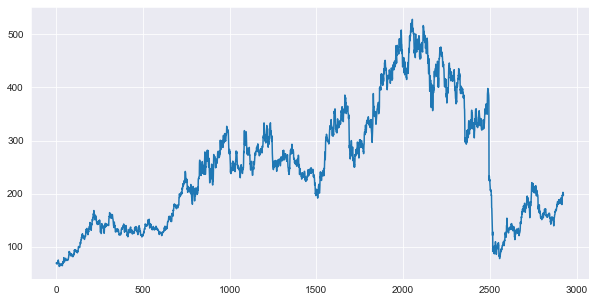

In [24]:
plt.figure(figsize=(10,5))  # Plot the histrocial data of Col column wrt Date
plt.plot(df1) 

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
print(df1)

[[0.01343537]
 [0.01427374]
 [0.01300544]
 ...
 [0.29577161]
 [0.286958  ]
 [0.2913648 ]]


## As we know in time-series data the one data is dependent on other data. The training size should be 80% of the total length of the data frame, the test size should be the difference between the length of the dataset and the training size.

In [28]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(2340, 585)

In [30]:
train_data

array([[0.01343537],
       [0.01427374],
       [0.01300544],
       ...,
       [0.72462858],
       [0.69958507],
       [0.70237966]])

## As we got our train and test in array format, Let's convert the data in matrix format

In [31]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

## As per study sequential data highly dependent on past data.
## So we are taking 100 days as timestamp

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
X_train.shape,y_train.shape

((2239, 100), (2239,))

In [34]:
X_test.shape,ytest.shape

((484, 100), (484,))

## Right now our data is in 2D,but for LSTM we need 3D.
## Let's convert it in 3D.......

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Build the Model

### Create the Stacked LSTM model
#### We are considering 3 layers of Input and 1layers of Output with MSE & Adam as loss & optimizer respt

## Let's fit the model..........
#### Here we are considering 
* 1. Epochs = 100 
* 2. Batch_size = 64
* 3. Verbose = 1        We can change these parameter as hyper twining conditions 

In [36]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = X_test.shape[1] * X_train.shape[2]
print(n_neurons, X_train.shape[1], X_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) 
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

# Training the model
epochs = 100
batch_size = 64
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(X_test, ytest))
                    
#callbacks=[early_stop])


100 100 1
Epoch 1/2
35/35 [==============================] - 16s 311ms/step - loss: 0.0244 - accuracy: 4.4663e-04 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 2/2
35/35 [==============================] - 10s 273ms/step - loss: 0.0021 - accuracy: 4.4663e-04 - val_loss: 0.0042 - val_accuracy: 0.0000e+00


## Save the Model

In [31]:
model.save("stacked_lstm.h5")

## Plot the Loss and Epoch graph 

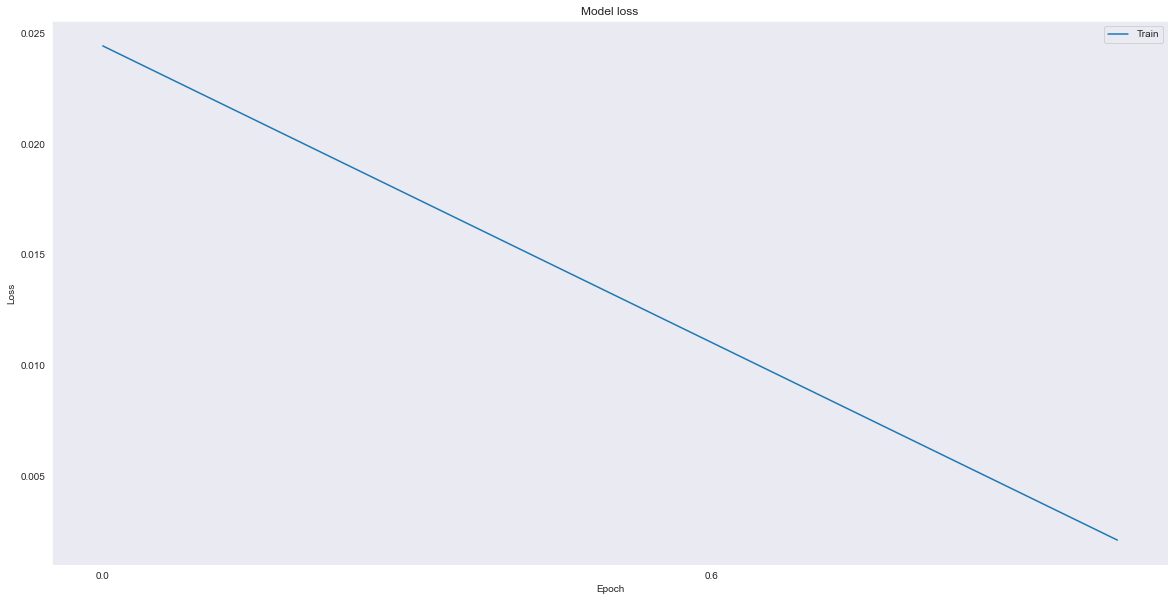

In [37]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="best")
plt.grid()
plt.show()

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           30200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 91,251
Trainable params: 91,251
Non-trainable params: 0
_________________________________________________________________


## Prediction & Evaluation 

In [39]:
## Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [40]:
train_predict

array([[0.05746657],
       [0.05709068],
       [0.05676267],
       ...,
       [0.7500487 ],
       [0.74735093],
       [0.74457693]], dtype=float32)

In [41]:
test_predict

array([[0.59139085],
       [0.59254175],
       [0.593954  ],
       [0.5954872 ],
       [0.59699583],
       [0.59818476],
       [0.5990782 ],
       [0.5996125 ],
       [0.59975237],
       [0.59963816],
       [0.59941363],
       [0.5989597 ],
       [0.59813875],
       [0.59691525],
       [0.59527826],
       [0.59332496],
       [0.591111  ],
       [0.5887339 ],
       [0.5862759 ],
       [0.5838442 ],
       [0.5814779 ],
       [0.5792252 ],
       [0.5772789 ],
       [0.5758419 ],
       [0.5749307 ],
       [0.5743054 ],
       [0.57382816],
       [0.57343495],
       [0.57318884],
       [0.5731221 ],
       [0.5734141 ],
       [0.5741934 ],
       [0.57558805],
       [0.57769775],
       [0.5805129 ],
       [0.5837913 ],
       [0.5873666 ],
       [0.5910567 ],
       [0.59494233],
       [0.59908503],
       [0.6032002 ],
       [0.60708576],
       [0.61089194],
       [0.61468005],
       [0.618474  ],
       [0.62193835],
       [0.6251946 ],
       [0.628

## Let's do reverse transformation

## Check the RMSE Score

In [42]:
### Calculate RMSE performance metrics
print('Train RMSE :',np.sqrt(mean_squared_error(y_train,train_predict)))
print('Test RMSE :',np.sqrt(mean_squared_error(ytest,test_predict)))

Train RMSE : 0.0380866678020778
Test RMSE : 0.06502565342690132


In [43]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

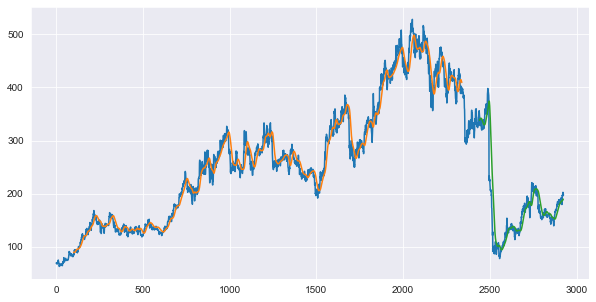

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### .....................................Done With Model Building/Training/Testing.......................................................................

# Predection for upcoming days

In [48]:
# Let's check total length of data and substract it from time stamp
user_input = len(test_data)-100 
user_input

485

In [49]:
x_input=test_data[user_input:].reshape(1,-1)   
x_input.shape 


(1, 100)

# Let's create temp input for predection

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
temp_input

[0.2078505332170575,
 0.20279885386717977,
 0.2012940990140502,
 0.19978931135972489,
 0.2065607574006017,
 0.20570087405510212,
 0.20355121489314676,
 0.20236892859502786,
 0.19978931135972489,
 0.20290634338551672,
 0.2093553208713828,
 0.2110750219599905,
 0.21171992626881625,
 0.21000019237901285,
 0.2122573410593051,
 0.21171992626881625,
 0.21558931932057507,
 0.2158042983572489,
 0.2118274157871532,
 0.21290224536813085,
 0.201831513804539,
 0.1949525782453253,
 0.1965648226167918,
 0.19602740782630296,
 0.17915260308567083,
 0.1830219961374296,
 0.17098389171000128,
 0.18431177195388537,
 0.19011584513092572,
 0.1910832179947622,
 0.18603150584368883,
 0.19645736589965063,
 0.20075668422356135,
 0.19935938608757292,
 0.1949525782453253,
 0.1933403338738588,
 0.19570497207248794,
 0.19839204602493216,
 0.19000838841378453,
 0.18893355883280682,
 0.18388184668173346,
 0.1829145066190927,
 0.17195123177264204,
 0.1643199351874614,
 0.17915260308567083,
 0.1804423789021266,
 0.1980

## Let's predecit for next 30 days

In [52]:
# demonstrate prediction for next days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.2757445]
101
1 day input [0.20279885 0.2012941  0.19978931 0.20656076 0.20570087 0.20355121
 0.20236893 0.19978931 0.20290634 0.20935532 0.21107502 0.21171993
 0.21000019 0.21225734 0.21171993 0.21558932 0.2158043  0.21182742
 0.21290225 0.20183151 0.19495258 0.19656482 0.19602741 0.1791526
 0.183022   0.17098389 0.18431177 0.19011585 0.19108322 0.18603151
 0.19645737 0.20075668 0.19935939 0.19495258 0.19334033 0.19570497
 0.19839205 0.19000839 0.18893356 0.18388185 0.18291451 0.17195123
 0.16431994 0.1791526  0.18044238 0.19806961 0.19903695 0.20795802
 0.20892536 0.21300973 0.22225328 0.21967366 0.22633762 0.23052944
 0.22601518 0.22494035 0.22698252 0.22784237 0.2357961  0.2378383
 0.25019884 0.2434274  0.25342333 0.25342333 0.26234441 0.25578794
 0.25417569 0.2510587  0.25911992 0.26277433 0.26513897 0.27019065
 0.26449407 0.25460562 0.25697026 0.26137707 0.26234441 0.26556889
 0.26460155 0.26277433 0.26761106 0.27341514 0.26126958 0.27685461
 0.26675121 0.25353079 0.26922331 0.

8 day output [[0.28332654]]
9 day input [0.20290634 0.20935532 0.21107502 0.21171993 0.21000019 0.21225734
 0.21171993 0.21558932 0.2158043  0.21182742 0.21290225 0.20183151
 0.19495258 0.19656482 0.19602741 0.1791526  0.183022   0.17098389
 0.18431177 0.19011585 0.19108322 0.18603151 0.19645737 0.20075668
 0.19935939 0.19495258 0.19334033 0.19570497 0.19839205 0.19000839
 0.18893356 0.18388185 0.18291451 0.17195123 0.16431994 0.1791526
 0.18044238 0.19806961 0.19903695 0.20795802 0.20892536 0.21300973
 0.22225328 0.21967366 0.22633762 0.23052944 0.22601518 0.22494035
 0.22698252 0.22784237 0.2357961  0.2378383  0.25019884 0.2434274
 0.25342333 0.25342333 0.26234441 0.25578794 0.25417569 0.2510587
 0.25911992 0.26277433 0.26513897 0.27019065 0.26449407 0.25460562
 0.25697026 0.26137707 0.26234441 0.26556889 0.26460155 0.26277433
 0.26761106 0.27341514 0.26126958 0.27685461 0.26675121 0.25353079
 0.26922331 0.27739202 0.26363421 0.25052128 0.27459746 0.2883553
 0.28513081 0.28480834 0.2

19 day output [[0.28533205]]
20 day input [0.20183151 0.19495258 0.19656482 0.19602741 0.1791526  0.183022
 0.17098389 0.18431177 0.19011585 0.19108322 0.18603151 0.19645737
 0.20075668 0.19935939 0.19495258 0.19334033 0.19570497 0.19839205
 0.19000839 0.18893356 0.18388185 0.18291451 0.17195123 0.16431994
 0.1791526  0.18044238 0.19806961 0.19903695 0.20795802 0.20892536
 0.21300973 0.22225328 0.21967366 0.22633762 0.23052944 0.22601518
 0.22494035 0.22698252 0.22784237 0.2357961  0.2378383  0.25019884
 0.2434274  0.25342333 0.25342333 0.26234441 0.25578794 0.25417569
 0.2510587  0.25911992 0.26277433 0.26513897 0.27019065 0.26449407
 0.25460562 0.25697026 0.26137707 0.26234441 0.26556889 0.26460155
 0.26277433 0.26761106 0.27341514 0.26126958 0.27685461 0.26675121
 0.25353079 0.26922331 0.27739202 0.26363421 0.25052128 0.27459746
 0.2883553  0.28513081 0.28480834 0.2938369  0.29996344 0.29577161
 0.286958   0.2913648  0.2757445  0.2773976  0.27885261 0.28007689
 0.28107288 0.28186309

28 day output [[0.28684422]]
29 day input [0.19108322 0.18603151 0.19645737 0.20075668 0.19935939 0.19495258
 0.19334033 0.19570497 0.19839205 0.19000839 0.18893356 0.18388185
 0.18291451 0.17195123 0.16431994 0.1791526  0.18044238 0.19806961
 0.19903695 0.20795802 0.20892536 0.21300973 0.22225328 0.21967366
 0.22633762 0.23052944 0.22601518 0.22494035 0.22698252 0.22784237
 0.2357961  0.2378383  0.25019884 0.2434274  0.25342333 0.25342333
 0.26234441 0.25578794 0.25417569 0.2510587  0.25911992 0.26277433
 0.26513897 0.27019065 0.26449407 0.25460562 0.25697026 0.26137707
 0.26234441 0.26556889 0.26460155 0.26277433 0.26761106 0.27341514
 0.26126958 0.27685461 0.26675121 0.25353079 0.26922331 0.27739202
 0.26363421 0.25052128 0.27459746 0.2883553  0.28513081 0.28480834
 0.2938369  0.29996344 0.29577161 0.286958   0.2913648  0.2757445
 0.2773976  0.27885261 0.28007689 0.28107288 0.28186309 0.28247949
 0.28295648 0.28332654 0.28361809 0.28385437 0.28405371 0.28422984
 0.28439257 0.2845486

In [53]:
df4= scaler.inverse_transform((lst_output))
df4

array([[191.23358899],
       [192.00259696],
       [192.67945262],
       [193.24897519],
       [193.71230148],
       [194.07989863],
       [194.36664243],
       [194.58853164],
       [194.76067774],
       [194.89630674],
       [195.00621849],
       [195.09895307],
       [195.18088779],
       [195.25658383],
       [195.32920211],
       [195.40078062],
       [195.47251163],
       [195.54508832],
       [195.61877412],
       [195.69362447],
       [195.76955619],
       [195.84638905],
       [195.92399828],
       [196.00212048],
       [196.08071404],
       [196.15957101],
       [196.2386498 ],
       [196.31781177],
       [196.39707079],
       [196.47631595]])

In [54]:
Range = df4[0],df4[-1]
Range

(array([191.23358899]), array([196.47631595]))

## We have predected future value lets plot them


In [55]:
day_new=np.arange(1,101)               # As we know we taking 100 as time stamp, that's we considering (1,101)
day_pred=np.arange(101,131)            # As we planning to preditic 30days,(101+30=131)

## Lets check total days for ploting graph

In [56]:
len(df1)

2925

## Before ploting let's transform our data

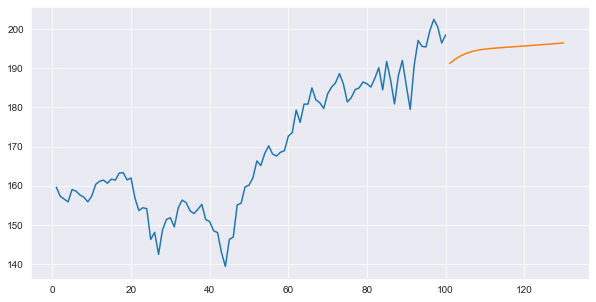

In [57]:
plt.figure(figsize=(10,5))
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

## Lets merge our predicted value with original and plot the graph

In [58]:
user_input2 = len(df1)-200

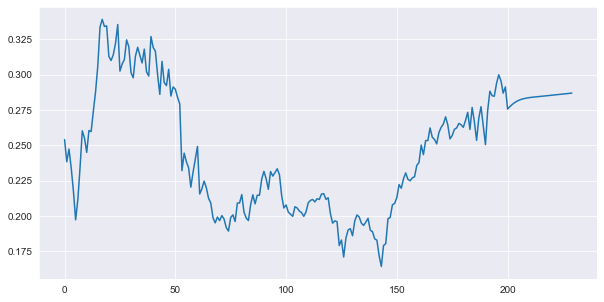

In [59]:
plt.figure(figsize=(10,5))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[user_input2:])

## Lets transform merged data for plotting

In [60]:
df3=scaler.inverse_transform(df3).tolist()

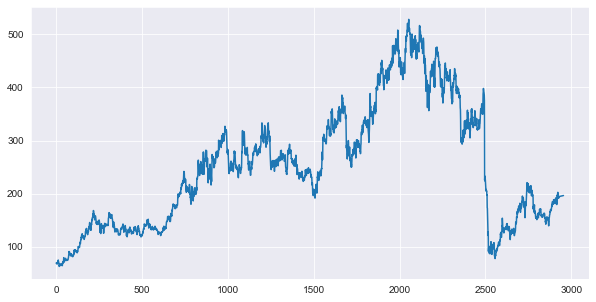

In [61]:
plt.figure(figsize=(10,5))
plt.plot(df3)

# ------------------------------------End----------------------------------------------